In [1]:
# this section is to drop unwanted columns and rows with NaN values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# convert_shot 是惠晴給我的
original_shots = pd.read_csv('convert_shot.csv')
original_rally = pd.read_csv('rally_0108.csv')
print("Original shots data columns: ")
print(original_shots.columns)
print("---------------------------------")

# nan_count = original_shots.isna().sum()
# print("Number of NaN values in each column: ")
# print(nan_count)
# print("---------------------------------")

print("drop nan values")
columns_to_check = ["player_location_x", "player_location_y", "opponent_location_x", "opponent_location_y", "shot_id", 
                    "rally_id", "shot_player", "shot_number"]
drop_nan_shots = original_shots.dropna(subset=columns_to_check)
# print("Number of NaN values in each column after dropping NaN values: ")
# print(drop_nan_shots.isna().sum())
print("data after dropping NaN values: drop_nan_shots")
print("---------------------------------")

print("drop nan values in rally data")
drop_nan_rally = original_rally.dropna(subset=["rally_id", "set_id"])
print("data after dropping NaN values: drop_nan_rally")
print("---------------------------------")

print("drop columns unrelated")
columns_to_drop = original_shots.columns.difference(columns_to_check)
# print("columns to drop: ")
# print(columns_to_drop)
drop_nan_and_unrelated_shots = drop_nan_shots.drop(columns=columns_to_drop)
print("length of data after dropping unrelated columns: ", len(drop_nan_and_unrelated_shots))
print("---------------------------------")

print("drop columns unrelated in rally data")
columns_to_check_rally = ["rally_id", "set_id"]
columns_to_drop_rally = drop_nan_rally.columns.difference(columns_to_check_rally)
drop_nan_and_unrelated_rally = drop_nan_rally.drop(columns=columns_to_drop_rally)
print("---------------------------------")

print("merge shots and rally data")
shots_with_set_id = pd.merge(drop_nan_and_unrelated_shots, drop_nan_and_unrelated_rally, on="rally_id", how="inner")
print("length of data after merging: ", len(shots_with_set_id))
print("columns of data after merging: ")
print(shots_with_set_id.columns)
print("---------------------------------")

print("output data to csv file")
shots_with_set_id.to_csv('shots_with_set_id.csv', index=False)
print("file name: shots_with_set_id.csv")
print("done")
print("---------------------------------")


Original shots data columns: 
Index(['shot_id', 'rally_id', 'shot_player', 'shot_number', 'shot_type',
       'shot_aroundhead', 'shot_backhand', 'shot_hit_position_x',
       'shot_hit_position_y', 'shot_return_position_x',
       'shot_return_position_y', 'shot_hit_area', 'shot_return_area',
       'shot_badminton_direction', 'shot_badminton_velocity',
       'shot_badminton_height', 'shot_return_height', 'frame_num', 'time',
       'flaw', 'player_location_area', 'player_location_x',
       'player_location_y', 'opponent_location_area', 'opponent_location_x',
       'opponent_location_y', 'end_frame_num'],
      dtype='object')
---------------------------------
drop nan values
data after dropping NaN values: drop_nan_shots
---------------------------------
drop nan values in rally data
data after dropping NaN values: drop_nan_rally
---------------------------------
drop columns unrelated
length of data after dropping unrelated columns:  194106
---------------------------------
drop 

drop all the number which is bigger than 134 and less than 0
max player_location_x:  59.40290957
max player_location_y:  134.0
max opponent_location_x:  63.53751307
max opponent_location_y:  133.9931051
length of data after dropping the number which is bigger than 134 and less than 0:  189726
use heat map to show the distribution of the potision


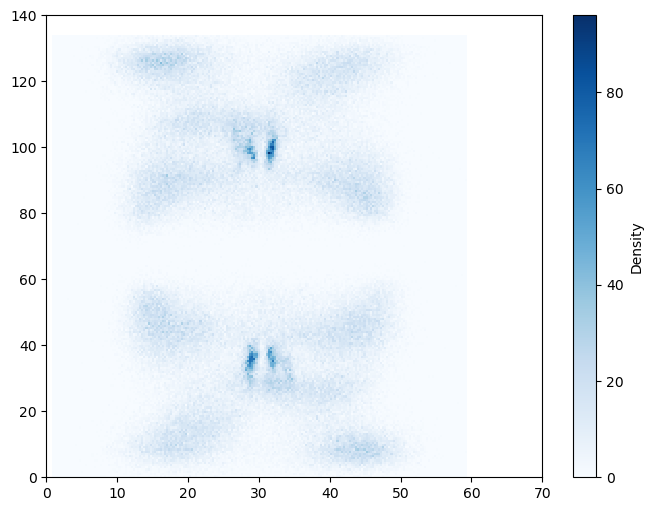

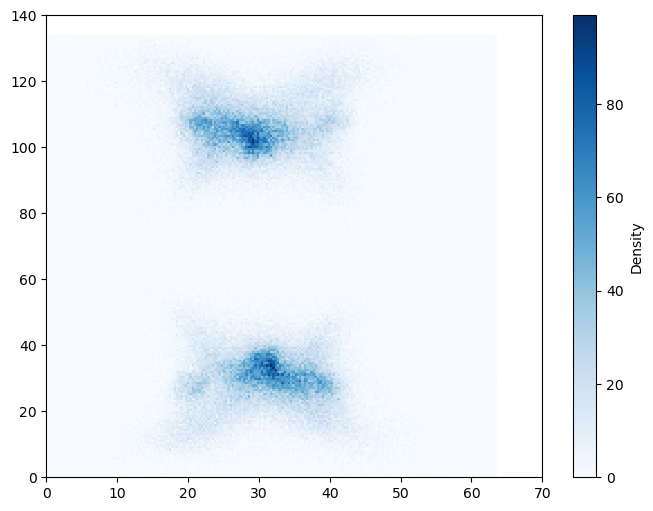

In [3]:

# drop all the number which is bigger than 134 and less than 0
print("drop all the number which is bigger than 134 and less than 0")
shots_with_set_id = shots_with_set_id[shots_with_set_id["player_location_x"] <= 134]
shots_with_set_id = shots_with_set_id[shots_with_set_id["player_location_x"] >= 0]
shots_with_set_id = shots_with_set_id[shots_with_set_id["player_location_y"] <= 134]
shots_with_set_id = shots_with_set_id[shots_with_set_id["player_location_y"] >= 0]
shots_with_set_id = shots_with_set_id[shots_with_set_id["opponent_location_x"] <= 134]
shots_with_set_id = shots_with_set_id[shots_with_set_id["opponent_location_x"] >= 0]
shots_with_set_id = shots_with_set_id[shots_with_set_id["opponent_location_y"] <= 134]
shots_with_set_id = shots_with_set_id[shots_with_set_id["opponent_location_y"] >= 0]

print("max player_location_x: ", shots_with_set_id["player_location_x"].max())
print("max player_location_y: ", shots_with_set_id["player_location_y"].max())
print("max opponent_location_x: ", shots_with_set_id["opponent_location_x"].max())
print("max opponent_location_y: ", shots_with_set_id["opponent_location_y"].max())

# print the remaining data number
print("length of data after dropping the number which is bigger than 134 and less than 0: ", len(shots_with_set_id))

# use heat map to show the distribution of the potision
print("use heat map to show the distribution of the potision")
plt.figure(figsize=(8, 6))
plt.hist2d(shots_with_set_id["player_location_x"], shots_with_set_id["player_location_y"], bins=200, cmap='Blues')
plt.colorbar(label='Density')

plt.xlim(0, 70)
plt.ylim(0, 140)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist2d(shots_with_set_id["opponent_location_x"], shots_with_set_id["opponent_location_y"], bins=200, cmap='Blues')
plt.colorbar(label='Density')

plt.xlim(0, 70)
plt.ylim(0, 140)
plt.show()